In [9]:
# 決定木

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from IPython.display import Image

In [3]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [4]:
model = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=0)

model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [5]:
dot_data = export_graphviz(model, out_file=None, feature_names=wine.feature_names, class_names=wine.target_names)

In [6]:
graph = pydotplus.graph_from_dot_data(dot_data)

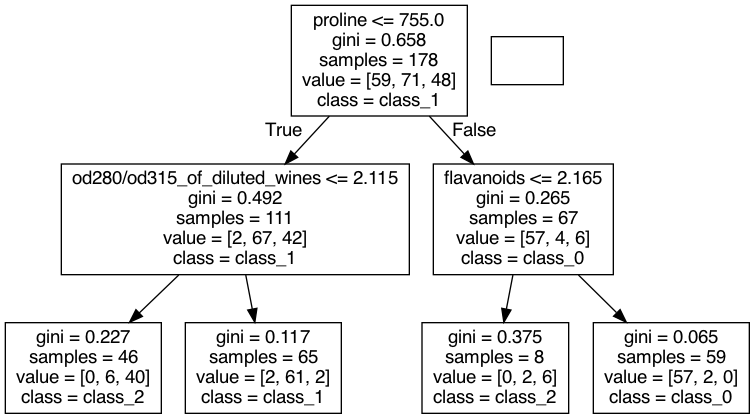

In [7]:
Image(graph.create_png())

In [8]:
graph.write_pdf("wine.pdf")
graph.write_png("wine.png")

True

In [11]:
# ランダムフォレスト

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
model = RandomForestClassifier(bootstrap=True, n_estimators=10, criterion="gini", max_depth=None, random_state=1)

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [18]:
y_test_pred = model.predict(X_test)
ac_score = accuracy_score(y_test, y_test_pred)
ac_score

0.9444444444444444

In [19]:
model.feature_importances_

array([0.07903103, 0.02145993, 0.01345731, 0.03624172, 0.02791499,
       0.04093279, 0.12546195, 0.0132444 , 0.0171055 , 0.25028014,
       0.04761158, 0.12916733, 0.19809131])

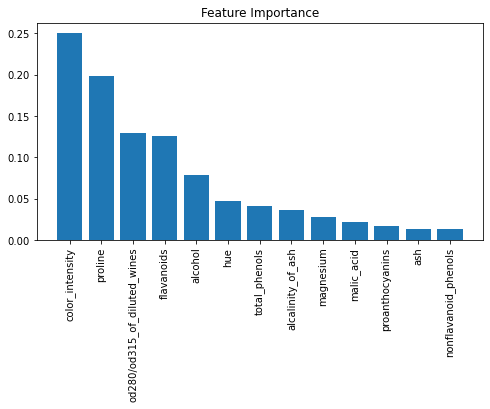

In [21]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [wine.feature_names[i] for i in indices]

plt.figure(figsize=(8, 4))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

In [1]:
# ロジスティック回帰

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [3]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [7]:
df_wine.columns = [
    "Class label",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
pd.DataFrame(df_wine.head())
df_wine  

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
print("df_wineの形状", df_wine.shape)

df_wineの形状 (178, 14)


In [8]:
X = df_wine.iloc[:, [10, 13]].values
y = df_wine.iloc[:, 0].values - 1
X[:5], y[:5]

(array([[   5.64, 1065.  ],
        [   4.38, 1050.  ],
        [   5.68, 1185.  ],
        [   7.8 , 1480.  ],
        [   4.32,  735.  ]]),
 array([0, 0, 0, 0, 0]))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
model = LogisticRegression(
    max_iter=100,
    multi_class="ovr",
    solver="liblinear",
    C=1.0,
    penalty="l2",
    l1_ratio=None,
    random_state=0
)
model.fit(X_train_std, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [12]:
y_test_pred = model.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
ac_score

0.8888888888888888

<AxesSubplot:>

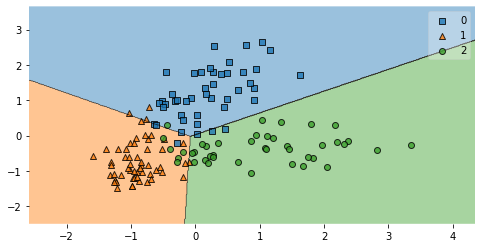

In [13]:
plt.figure(figsize=(8, 4))
plot_decision_regions(X_train_std, y_train, model)

<AxesSubplot:>

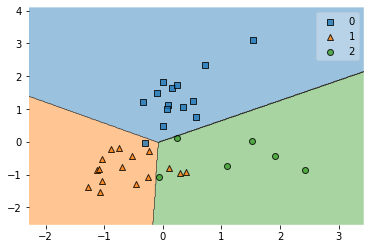

In [16]:
plot_decision_regions(X_test_std, y_test, model)

In [17]:
new_data = [
    [-.1, -.1]
]

model.predict(new_data)

array([1])

In [18]:
model.decision_function(new_data)

array([[-1.53440515, -1.10426236, -1.21288981]])

In [19]:
model.predict_proba(new_data)

array([[0.27056424, 0.37978463, 0.34965113]])

In [20]:
sc.inverse_transform(new_data)

array([[  4.80800966, 712.05964791]])

In [21]:
model = LogisticRegression(
    max_iter=100,
    multi_class="multinomial",
    solver="lbfgs",
    C=1.0,
    penalty="l2",
    l1_ratio=None,
    random_state=0
)

model.fit(X_train_std, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [23]:
y_test_pred = model.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
ac_score

0.8888888888888888

In [22]:
model.predict(new_data)

array([2])

In [24]:
model.decision_function(new_data)

array([[-0.11579049, -0.21655638,  0.33234687]])

In [26]:
model.predict_proba(new_data)

array([[0.28822278, 0.26059509, 0.45118213]])

In [27]:
y_test_pred = model.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
ac_score

0.8888888888888888

<AxesSubplot:>

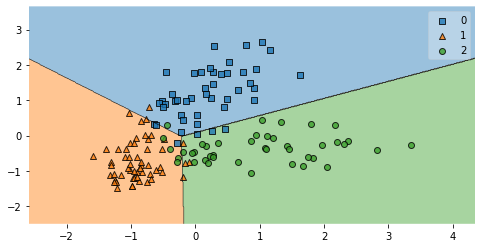

In [28]:
plt.figure(figsize=(8, 4))
plot_decision_regions(X_train_std, y_train, model)

In [29]:
# SVC

In [30]:
from sklearn.svm import LinearSVC

In [60]:
_X = X[44:71, :]
_y = y[44:71]

In [61]:
_sc = StandardScaler()
_X_std = _sc.fit_transform(_X)

In [62]:
model_svc = LinearSVC(
    loss="hinge",
    C=10000.0,
    multi_class="ovr",
    penalty="l2",
    random_state=0
)

model_svc.fit(_X_std, _y)

LinearSVC(C=10000.0, loss='hinge', random_state=0)

In [63]:
model_svc.coef_

array([[-1.49888846, -2.32820066]])

In [64]:
model_svc.intercept_

array([-1.18347866])

In [78]:
X_plt = np.linspace(-3, 3, 200)[:, np.newaxis]

w = model_svc.coef_[0]
b = model_svc.intercept_[0]

decision_boundary = (-1 * (w[0]/w[1] * X_plt)) - b/w[1]

margin = 1/w[1]
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

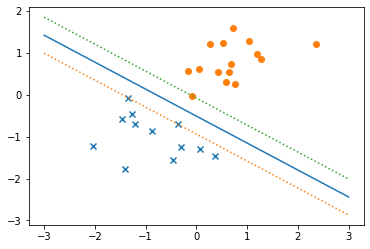

In [79]:
plt.plot(
    X_plt, decision_boundary, linestyle="-"
)
plt.plot(
    X_plt, margin_up, linestyle=":"
)
plt.plot(
    X_plt, margin_down, linestyle=":"
)

plt.scatter(
    _X_std[:, 0][_y==1], _X_std[:, 1][_y==1], marker="x"
)
plt.scatter(
    _X_std[:, 0][_y==0], _X_std[:, 1][_y==0], marker="o"
)

plt.show()

In [80]:
# SVC(soft)

In [81]:
model_svc_soft = LinearSVC(
    loss = "hinge",
    C = 1.0,
    multi_class = "ovr",
    penalty = "l2",
    random_state = 0
)

model_svc_soft.fit(_X_std, _y)

LinearSVC(loss='hinge', random_state=0)

In [82]:
w = model_svc_soft.coef_[0]
b = model_svc_soft.intercept_[0]

decision_boundary = (-1 * (w[0]/w[1] * X_plt)) - b/w[1]

margin = 1/w[1]
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

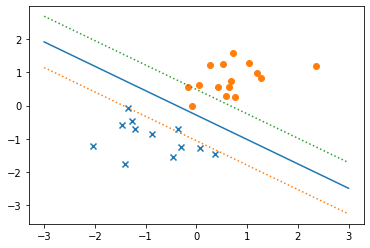

In [83]:
plt.plot(
    X_plt, decision_boundary, linestyle="-"
)
plt.plot(
    X_plt, margin_up, linestyle=":"
)
plt.plot(
    X_plt, margin_down, linestyle=":"
)

plt.scatter(
    _X_std[:, 0][_y==1], _X_std[:, 1][_y==1], marker="x"
)
plt.scatter(
    _X_std[:, 0][_y==0], _X_std[:, 1][_y==0], marker="o"
)

plt.show()

In [84]:
# ガウシアンカーネルSVC

In [94]:
from sklearn.svm import SVC

In [95]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [96]:
df_wine.columns = [
    "Class label",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
pd.DataFrame(df_wine.head())
df_wine  

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [98]:
X = df_wine.iloc[:, [10, 13]].values
y = df_wine.iloc[:, 0].values - 1

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [100]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [127]:
gamma = 2.5
model = SVC(
    kernel = "rbf",
    gamma = gamma,
    C = 100,
    decision_function_shape = "ovr",
    random_state = 0
)
model.fit(X_train_std, y_train)

SVC(C=100, gamma=2.5, random_state=0)

In [128]:
y_test_pred = model.predict(X_test_std)

In [129]:
accuracy_score(y_test, y_test_pred)

0.9166666666666666

<AxesSubplot:>

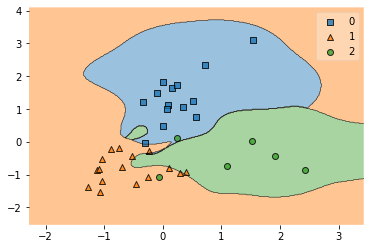

In [130]:
plot_decision_regions(X_test_std, y_test, model)

<AxesSubplot:>

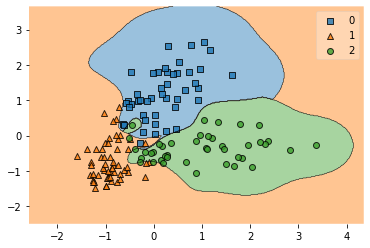

In [108]:
plot_decision_regions(X_train_std, y_train, model)